# Pre-processing and Training Data Development

In [1]:
#Load relevant Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [2]:
# Load files
shots_07_22_cleaned = pd.read_csv(r"C:\Users\Travi\OneDrive\Documents\GitHub\Springboard\nhl data\shots_07_22\shots_07_22_cleaned.csv")
shots_07_22_cleaned = shots_07_22_cleaned.drop(columns='shooterName')

# View loaded data
shots_07_22_cleaned.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS,power_play,situation
0,0,NSH,SJS,2022,20001,8,1.0,6,1,AWAY,...,0.037040,0.398742,0.300830,0.022987,0.710473,1.0,SJS,47.0,0,5v5
1,2,NSH,SJS,2022,20001,15,2.0,3,1,HOME,...,0.051420,0.358080,0.259696,0.027936,0.644651,1.0,NSH,31.0,0,5v5
2,3,NSH,SJS,2022,20001,16,0.0,2,1,HOME,...,0.092112,0.230564,0.183049,0.024885,0.898032,1.0,NSH,76.0,0,5v5
3,4,NSH,SJS,2022,20001,18,1.0,11,1,HOME,...,0.062224,0.446106,0.286419,0.019556,0.759405,1.0,NSH,82.0,0,5v5
4,6,NSH,SJS,2022,20001,26,25.0,7,1,AWAY,...,0.046011,0.454167,0.309893,0.022000,0.536515,1.0,SJS,75.0,0,5v5


## Train/Test Split

To help prevent data leakage we will split the data first

In [3]:
# Seperating target variable
X = shots_07_22_cleaned['goal']
y = shots_07_22_cleaned.drop(columns='goal')

# Splitting the data inot a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [4]:
# View training split 
y_train.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS,power_play,situation
904946,884120,EDM,CHI,2011,20285,293,8.0,3,3,AWAY,...,0.048678,0.345752,0.210421,0.026048,0.741030,1.0,CHI,29.0,0,5v5
811797,1013715,LAK,MIN,2012,20552,253,1.0,17,3,AWAY,...,0.037399,0.412227,0.343185,0.021859,0.676036,1.0,MIN,46.0,0,5v5
45717,63880,NYI,CAR,2022,20739,191,19.0,0,2,AWAY,...,0.082092,0.072610,0.039572,0.058054,0.978681,1.0,CAR,86.0,1,5v5
58035,81210,WPG,COL,2022,20935,181,10.0,29,2,AWAY,...,0.037810,0.332428,0.393354,0.019828,0.742940,1.0,COL,67.0,1,5v5
379631,340974,VAN,MIN,2018,20423,164,0.0,48,2,HOME,...,0.074904,0.532255,0.188841,0.021452,0.635979,1.0,VAN,53.0,1,5v4


In [5]:
# View test split
y_test.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS,power_play,situation
805801,1022126,BOS,PIT,2012,20654,289,3.0,5,3,AWAY,...,0.045736,0.463963,0.309681,0.020004,0.588444,1.0,PIT,35.0,0,5v5
229766,196284,NYI,PIT,2020,30116,302,10.0,24,3,HOME,...,0.050515,0.492223,0.239852,0.020077,0.684152,1.0,NYI,48.0,1,5v4
623401,1275892,BUF,SJS,2015,20248,138,1.0,23,2,AWAY,...,0.022854,0.346354,0.346090,0.027306,0.769847,1.0,SJS,49.0,0,5v5
21756,30240,STL,DAL,2022,20350,264,31.0,19,3,HOME,...,0.039749,0.460902,0.291940,0.019520,0.756097,1.0,STL,75.0,0,5v5
129381,58045,MTL,EDM,2021,20772,138,26.0,9,2,HOME,...,0.042496,0.476367,0.282344,0.021609,0.657520,1.0,MTL,60.0,0,5v5


## Encoding Categorical Columns

Now that the data as been split into a training and test set, I will examine the categorical columns for encoding.

In [6]:
# Create list of categorical columns
y_train_cat = y_train.select_dtypes(object)
cols = y_train_cat.columns

Now that I have a list of my categorical columns that will need to be encoded, I want to see how many levels are in each categorical feature. This will help me to decide on the proper encoding method.

In [7]:
# Calculating number of levels for the remaining categorical columns
for col in y_train[cols]:
    print(f"{col} = {y_train[col].nunique()} categories")

homeTeamCode = 33 categories
awayTeamCode = 33 categories
team = 2 categories
location = 3 categories
event = 2 categories
shotType = 7 categories
lastEventCategory = 18 categories
playerPositionThatDidEvent = 5 categories
shooterLeftRight = 2 categories
teamCode = 33 categories
situation = 7 categories


#### One-hot Encoding

 There are a 3 different features that have only 2 levels. These are "binary' type features, therefore, I decided to encode them with a simple 0 or 1.

In [8]:
# Encoding columns with only 2 levels with one-hot encoding on the training set
y_train['team'] = y_train['team'].map({'HOME':0, 'AWAY':1})
y_train['shooterLeftRight'] = y_train['shooterLeftRight'].map({'R':0, 'L':1})
y_train['event'] = y_train['event'].map({'SHOT':0, 'GOAL':1})
y_train[['team', 'shooterLeftRight', 'event']].head()

,team,shooterLeftRight,event
904946,1,1,0
811797,1,0,0
45717,1,1,0
58035,1,1,0
379631,0,0,0


In [9]:
# Encoding columns with only 2 levels with one-hot encoding on the test set
y_test['team'] = y_test['team'].map({'HOME':0, 'AWAY':1})
y_test['shooterLeftRight'] = y_test['shooterLeftRight'].map({'R':0, 'L':1})
y_test['event'] = y_test['event'].map({'SHOT':0, 'GOAL':1})
y_test[['team', 'shooterLeftRight', 'event']].head()

,team,shooterLeftRight,event
805801,1,0,0
229766,0,1,0
623401,1,1,0
21756,0,1,0
129381,0,0,0


#### Target Encoding

Now that I have encoded all of my 2 level features, I will perform target encoding on categories believed to have a correlation to our target. I want to help capture their relationship to the target.

In [10]:
# Columns for target encoding
cols_target = ['playerPositionThatDidEvent','lastEventCategory', 'shotType']
# Target encoder
encoder = ce.TargetEncoder(cols= cols_target, smoothing=10, return_df=True)

In [11]:
# Encode the training set
y_train_transformed = encoder.fit_transform(y_train, X_train)
y_test_transformed = encoder.transform(y_test)
y_train_transformed[cols_target].head()

,playerPositionThatDidEvent,lastEventCategory,shotType
904946,0.049603,0.071388,0.060134
811797,0.107124,0.123604,0.060134
45717,0.109166,0.123604,0.089188
58035,0.049603,0.071388,0.089188
379631,0.107124,0.123604,0.089188


In [12]:
y_test_transformed[cols_target].head()

,playerPositionThatDidEvent,lastEventCategory,shotType
805801,0.049603,0.103761,0.060134
229766,0.109243,0.123604,0.089188
623401,0.109243,0.094858,0.089188
21756,0.109166,0.112843,0.089188
129381,0.107124,0.068862,0.089188


#### Frequancy Encoding

I will encode the remaining columns with frequancy encoding as the relationship to the target is not as important with these features. 

In [13]:
# Columns to encode
cols_freq = ['homeTeamCode', 'awayTeamCode', 'situation', 'teamCode', 'location' ]

# Function to apply frequency encoding
def frequency_encode(train, test, columns):
    """
    Encode categorical columns with frequency counts of each level within the column.
    
    Parameters:
    train (pd.DataFrame): The DataFrame to encode.
    columns (list): List of columns within DataFrame to encode.
    """
    for col in columns:
        # Calculate frequency counts on the training set
        frequency_map = train[col].value_counts()  # Absolute counts

        # Map frequencies to the train and test sets
        train[col] = train[col].map(frequency_map)
        test[col] = test[col].map(frequency_map).fillna(0)  # Fill unseen categories with 0
    return train, test

In [14]:
# Encode the training and test set
y_train_encoded, y_test_encoded = frequency_encode(y_train_transformed, y_test_transformed, cols_freq)

# View encoded training set
y_train_encoded.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS,power_play,situation
904946,884120,31521,33797,2011,20285,293,8.0,3,3,1,...,0.048678,0.345752,0.210421,0.026048,0.741030,1.0,34541,29.0,0,796168
811797,1013715,30841,31969,2012,20552,253,1.0,17,3,1,...,0.037399,0.412227,0.343185,0.021859,0.676036,1.0,30611,46.0,0,796168
45717,63880,32405,32421,2022,20739,191,19.0,0,2,1,...,0.082092,0.072610,0.039572,0.058054,0.978681,1.0,33826,86.0,1,796168
58035,81210,23664,32271,2022,20935,181,10.0,29,2,1,...,0.037810,0.332428,0.393354,0.019828,0.742940,1.0,32630,67.0,1,796168
379631,340974,31743,31969,2018,20423,164,0.0,48,2,0,...,0.074904,0.532255,0.188841,0.021452,0.635979,1.0,31316,53.0,1,144248


In [15]:
# View encoded test set
y_test_encoded.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS,power_play,situation
805801,1022126,35367,34682,2012,20654,289,3.0,5,3,1,...,0.045736,0.463963,0.309681,0.020004,0.588444,1.0,36398,35.0,0,796168
229766,196284,32405,34682,2020,30116,302,10.0,24,3,0,...,0.050515,0.492223,0.239852,0.020077,0.684152,1.0,31584,48.0,1,144248
623401,1275892,31168,33475,2015,20248,138,1.0,23,2,1,...,0.022854,0.346354,0.346090,0.027306,0.769847,1.0,34866,49.0,0,796168
21756,30240,30938,32298,2022,20350,264,31.0,19,3,0,...,0.039749,0.460902,0.291940,0.019520,0.756097,1.0,31943,75.0,0,796168
129381,58045,33042,31520,2021,20772,138,26.0,9,2,0,...,0.042496,0.476367,0.282344,0.021609,0.657520,1.0,32690,60.0,0,796168


# Stadardization And Normalization

Now that encoding of the categorical features is complete. We will perform the last pre-processing step: Standardization And Normalization.  

We will start by applying log transformations to skewed features.

#### Log Transformation

In [16]:
# Check for skewness 
skewness = y_train_encoded.skew()

# Filter skewness values
skewed_features = skewness[(skewness < -1) | (skewness > 1)]
skewed_features = list(skewed_features.index)

# Print the skewed features
print(skewed_features)

['homeTeamCode', 'awayTeamCode', 'game_id', 'timeUntilNextEvent', 'timeSinceLastEvent', 'location', 'event', 'shotGeneratedRebound', 'shotAnglePlusRebound', 'shotAngleReboundRoyalRoad', 'shotType', 'shotOnEmptyNet', 'shotRebound', 'shotAnglePlusReboundSpeed', 'shotRush', 'speedFromLastEvent', 'lastEventShotDistance', 'homeEmptyNet', 'awayEmptyNet', 'homeSkatersOnIce', 'awaySkatersOnIce', 'awayPenalty1Length', 'homePenalty1Length', 'timeSinceFaceoff', 'shooterPlayerId', 'xGoal', 'xFroze', 'xRebound', 'xPlayContinuedInZone', 'xPlayContinuedOutsideZone', 'xPlayStopped', 'teamCode', 'power_play', 'situation']


In [17]:
# Apply log transformation to skewed features (using +1 to avoid log(0) issues)
y_train_encoded[skewed_features] = np.log1p(abs(y_train_encoded[skewed_features]))

# Apply the same transformation to the test set
y_test_encoded[skewed_features] = np.log1p(abs(y_test_encoded[skewed_features]))

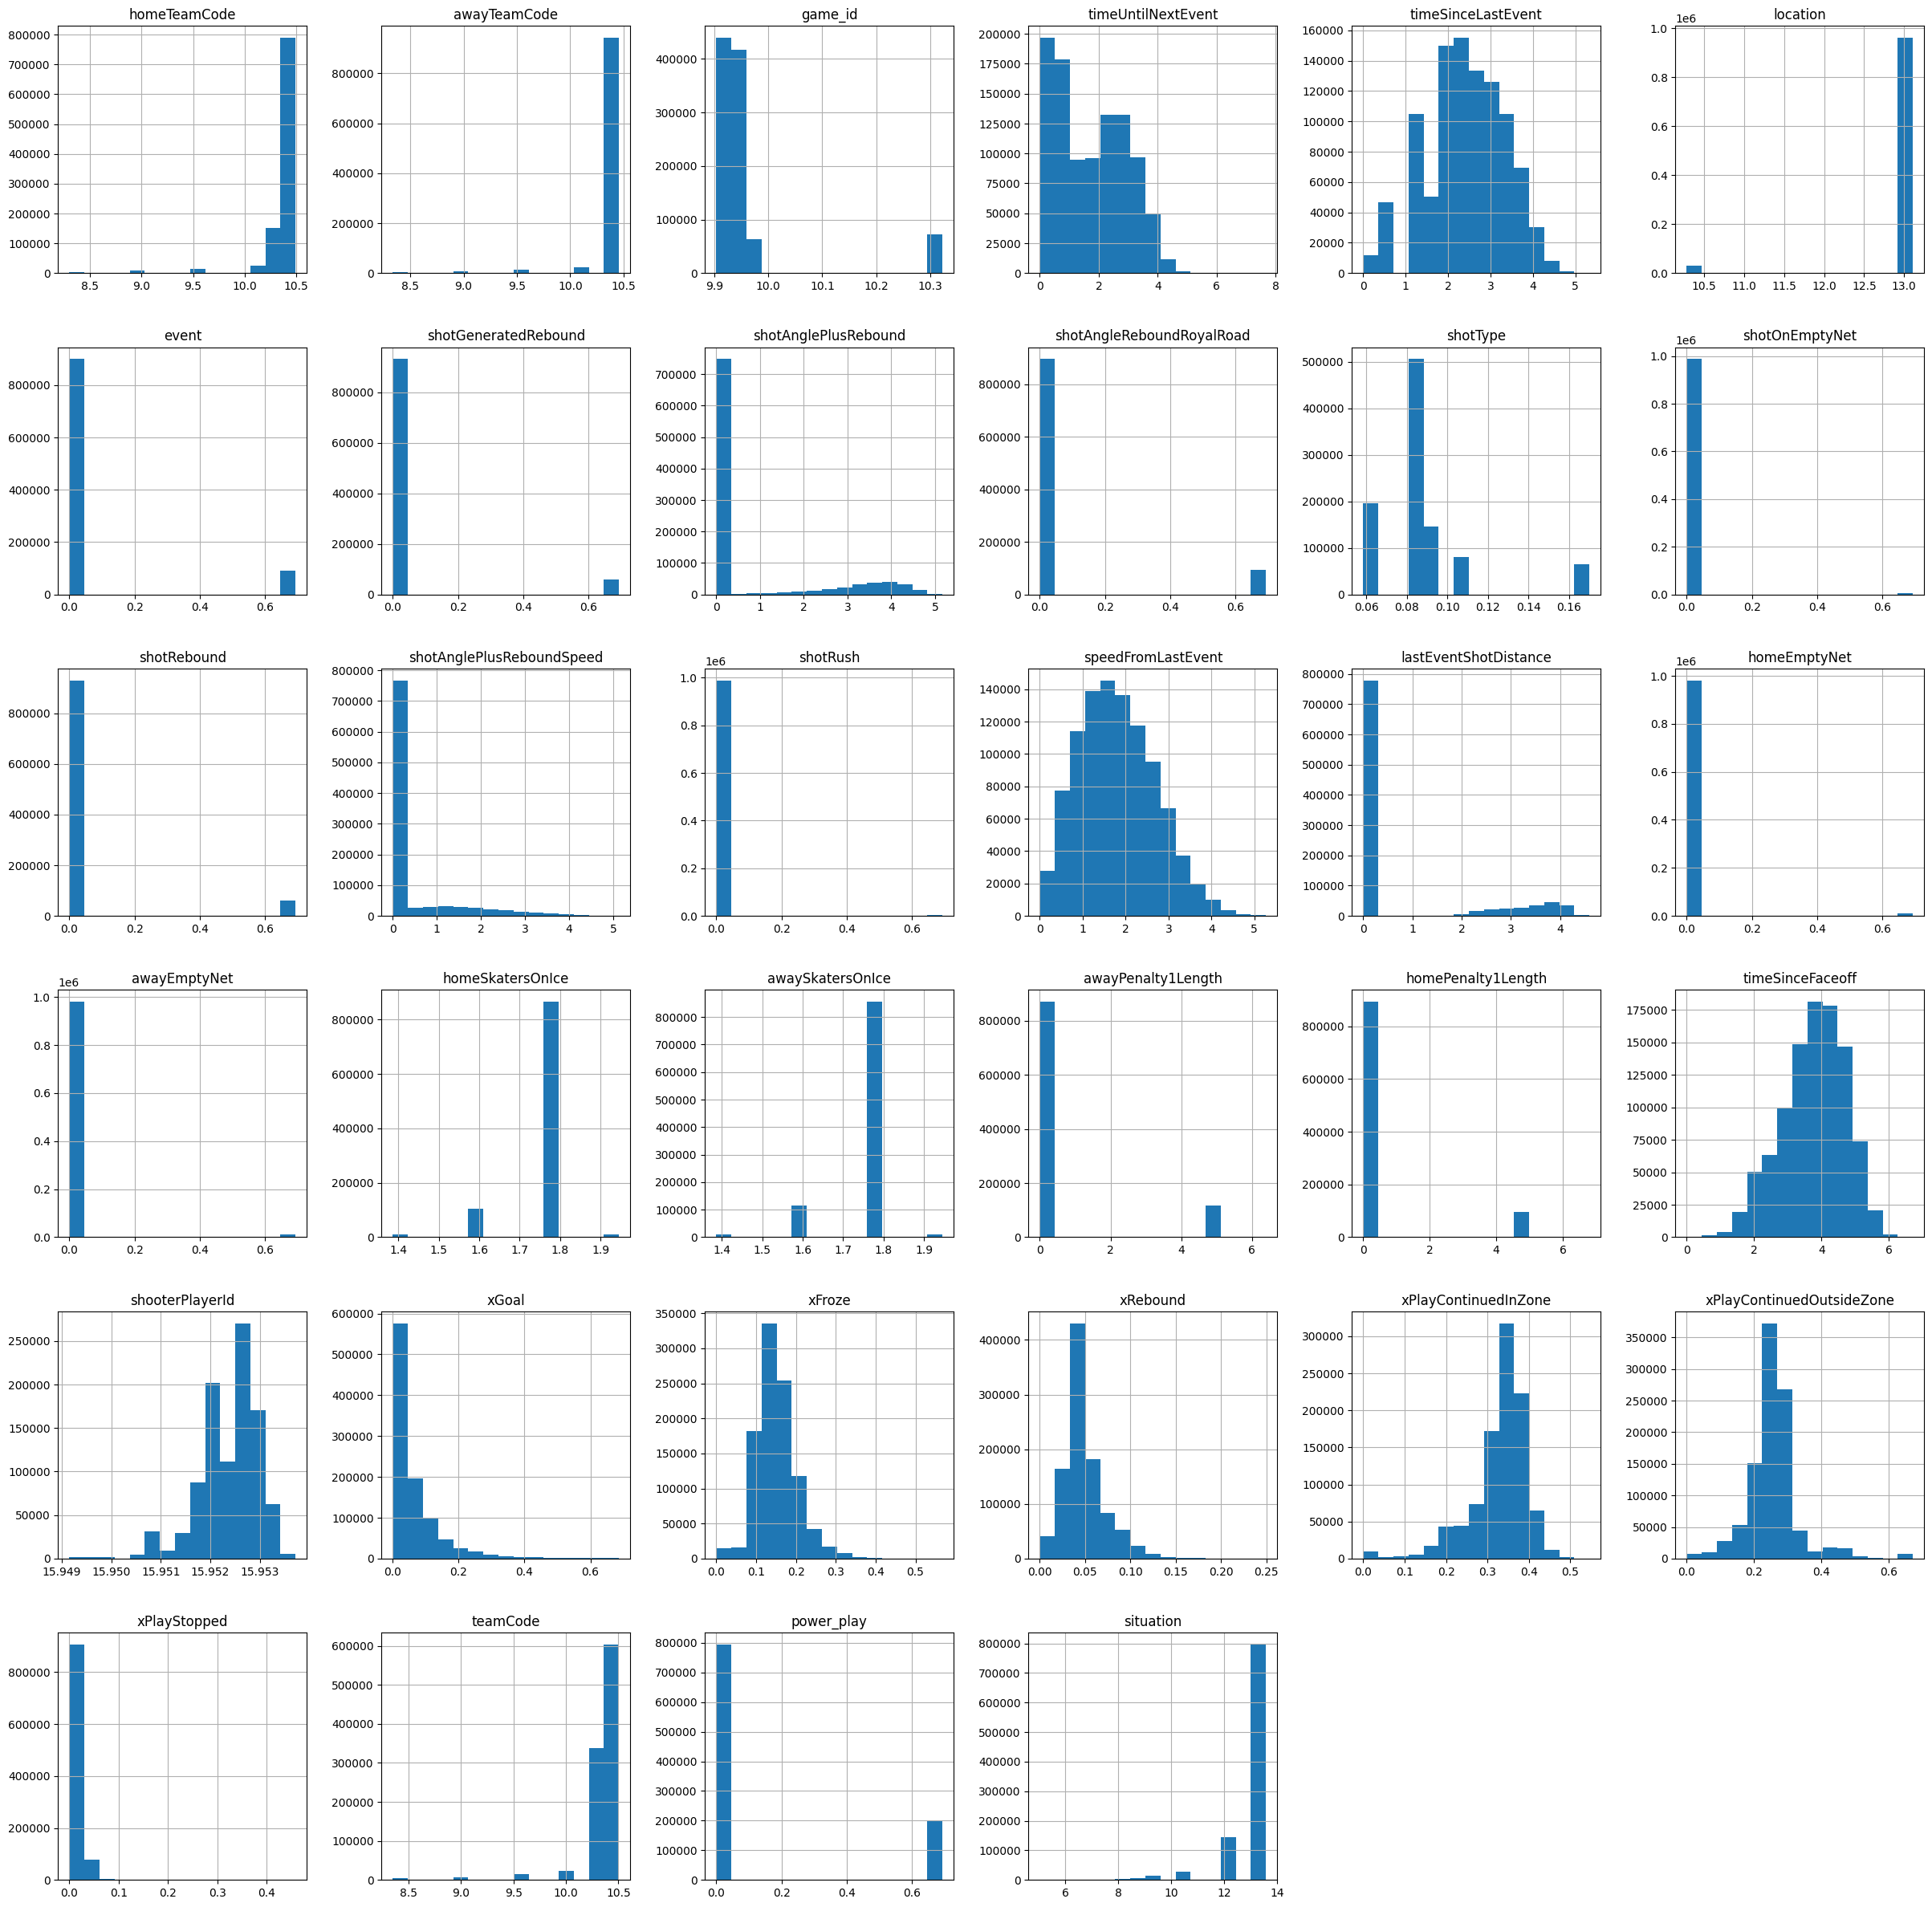

In [18]:
# View transformed distubutions
_=y_train_encoded[skewed_features].hist(bins= 15, figsize=(30,30))

#### Standard Scaler and Min-Max Scaler

Now that we have transformed our skewed columns, we will use a standard scaler to standardize the unbounded (non-probability based) columns and using a min_max scaler on the bounded (probability based) columns.

In [19]:
# Seperate columns for standard scaler and min-max scaler
bound_col = ['xGoal', 'xFroze','xRebound', 'xPlayContinuedInZone', 'xPlayContinuedOutsideZone', 'xPlayStopped', 'xShotWasOnGoal']
non_bound_col = list(y_train_encoded.drop(columns=bound_col).columns)

In [20]:
# Define the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), non_bound_col),
        ('minmax_scaler', MinMaxScaler(), bound_col)],
    remainder='passthrough'  # Leave other features unchanged
)

# Fit and transform the training data
y_train_scaled = pd.DataFrame(preprocessor.fit_transform(y_train_encoded), columns = y_train_encoded.columns)

# Apply the same transformation to the test data
y_test_scaled = pd.DataFrame(preprocessor.transform(y_test_encoded), columns = y_test_encoded.columns)

In [21]:
# View scaled training data
y_train_scaled.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS,power_play,situation
0,0.288590,0.040620,0.366219,-0.770336,-0.428465,1.442212,0.430370,-1.147991,1.142466,1.027322,...,-1.625104,-0.498209,0.442356,0.061700,0.495194,0.190527,0.543389,0.283995,0.056013,0.745951
1,0.556981,-0.060612,0.107328,-0.555520,-0.298366,1.007925,-0.774347,0.508294,1.142466,1.027322,...,-0.722722,-0.498209,0.442356,0.031726,0.264790,0.147179,0.631617,0.438770,0.047102,0.680525
2,-1.410128,0.169004,0.172695,1.592637,-0.208251,0.334782,1.069949,-2.674574,-0.038067,1.027322,...,1.400530,2.007190,0.442356,0.569275,0.418621,0.316257,0.128266,0.057714,0.122922,0.985180
3,-1.374237,-1.290156,0.151104,1.592637,-0.114666,0.226210,0.591101,1.070814,-0.038067,1.027322,...,0.391985,2.007190,0.442356,0.063489,0.277937,0.148769,0.525182,0.493303,0.042769,0.747874
4,-0.836266,0.073196,0.107328,0.733374,-0.361011,0.041638,-1.329536,1.611086,-0.038067,-0.973404,...,-0.351153,2.007190,-1.241668,0.070292,0.218427,0.289542,0.780885,0.257243,0.046234,0.640202


In [22]:
# View scaled test data
y_test_scaled.head()

,shotID,homeTeamCode,awayTeamCode,season,game_id,id,timeUntilNextEvent,timeSinceLastEvent,period,team,...,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,shotWasOnGoal,teamCode,arenaAdjustedXCordABS,power_play,situation
0,0.574400,0.575001,0.486567,-0.555520,-0.249111,1.398783,-0.219159,-0.701494,1.142466,1.027322,...,-1.306616,-0.498209,0.442356,0.033028,0.225536,0.179264,0.697455,0.401204,0.043144,0.592352
1,-1.135919,0.169004,0.486567,1.163005,3.503175,1.539926,0.591101,0.870042,1.142466,-0.973404,...,-0.616559,2.007190,-1.241668,0.044116,0.269738,0.197542,0.732442,0.319722,0.043299,0.688695
2,1.099950,-0.011656,0.321647,0.088927,-0.446629,-0.240648,-0.774347,0.825089,-0.038067,1.027322,...,-0.563478,-0.498209,0.442356,0.008945,0.393178,0.090578,0.544208,0.441982,0.058682,0.774959
3,-1.479796,-0.046036,0.154997,1.592637,-0.396636,1.127354,1.446406,0.624317,1.142466,-0.973404,...,0.816636,-0.498209,0.442356,0.031812,0.268570,0.156250,0.693625,0.380922,0.042110,0.761118
4,-1.422212,0.259364,0.041473,1.377821,-0.192432,-0.240648,1.310323,-0.138975,-0.038067,-0.973404,...,0.020416,-0.498209,0.442356,0.049127,0.233569,0.166825,0.712894,0.369835,0.046569,0.661886


## Saving Data

We have now completed our pre-processing steps of splitting, encoding, and scaling our data. The last step is to save our newly transformed data. I will save both an unscaled and scaled version of the data set.  

The reason is that I will be experimenting with tree-based models (not sensitive to unscaled data) and non-tree based models (sensitive to unscaled data).

In [29]:
# Function to save my transformed files
def save_file(df, directory, filename):
    """
    Save the given DataFrame to the specified directory with the given filename.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to save.
    directory (str): The directory where the DataFrame will be saved.
    filename (str): The name of the file to save the DataFrame as.
    """
    file_path = f"{directory}/{filename}.csv"
    df.to_csv(file_path, index=False)

In [30]:
# Saving transformed files
directory = r'C:\Users\Travi\OneDrive\Documents\GitHub\Springboard-Data-Science-Capstone-Project-2\nhl data\shots_07_22'
file_names = {'y_train_unscaled': y_train_encoded, 'y_test_unscaled': y_test_encoded, 'y_train_scaled': y_train_scaled, 'y_test_scaled': y_test_scaled, \
              'X_train': X_train, 'X_test': X_test}
for key, value in file_names.items():
    save_file(value, directory, key)